<center>
<h1> Linear Regression Case Study
</center>

#### Steps for Regression Modeling:
1. Business problem definition - One of major automobile company would like to design new product which can improve the sales. Inorder to define the product, they want to understand identify drivers for the sales(what are the factors driving sales) and Predicting sales of different car models given driving factors. 
2. convert business problem into statistical problem  sales = F(sales attributes, product features, marketing info etc.)
3. Finding the right technique - Since it is predicting value (Regression Problem) problem so we can use OLS as one of the technique. We can also use other techniques like Decision Trees, Ensemble learning, KNN, SVM, ANN etc.
4. Data colletion(Y, X) - Identify the sources of information and collect the data
5. Consolidate the data - aggregate and consolidate the data at Model level/customer level/store level depends on business problem
6. Data preparation for modeling (create data audit report to identify the steps to perform as part of data preparation)
    a. missing value treatment
    b. outlier treatment
    c. dummy variable creation
7. Variable creation by using transformation and derived variable creation.
8. Basic assumptions (Normality, linearity, no outliers, homoscadasticity, no pattern in residuals, no auto correlation etc)
9. Variable reduction techniques (removing multicollinerity with the help of FA/PCA, correlation matrics, VIF)
10. Create dev and validation data sets (50:50 if you have more data else 70:30 or 80:20)
11. Modeling on dev data set (identify significant variables, model interpretation, check the signs and coefficients, multi-collinierity check, measures of good neess fit, final mathematical equation etc)
12. validating on validation data set (check the stability of model, scoring, decile analysis, cross validation etc.)
13. Output interpretation and derive insights (understand the limitations of the model and define strategy to implementation)
14. convert statistical solution into business solutions (implementation, model monitoring etc)


In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stat
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling 
import statsmodels as sm
%pylab inline
#%matplotlib inline

plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

Populating the interactive namespace from numpy and matplotlib


<Figure size 720x540 with 0 Axes>

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


#from sklearn.preprocessing import imputation
#from sklearn.preprocessing import StandardScaler
#from sklearn.linear_model import  Lasso, Ridge, ElasticNet
#from sklearn.decomposition import PCA
#from sklearn.manifold import TSNE
#from sklearn.cluster import KMeans, DBSCAN
#from sklearn.svm import SVR
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

In [6]:
%pwd

'/Users/mayur/Desktop/1. Case Study - Automobile Example - Class Exercise'

In [7]:
car_sales = pd.read_csv('Car_sales.csv')

In [8]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
Manufacturer              157 non-null object
Model                     157 non-null object
Sales_in_thousands        157 non-null float64
four_year_resale_value    121 non-null float64
Vehicle_type              157 non-null object
Price_in_thousands        155 non-null float64
Engine_size               156 non-null float64
Horsepower                156 non-null float64
Wheelbase                 156 non-null float64
Width                     156 non-null float64
Length                    156 non-null float64
Curb_weight               155 non-null float64
Fuel_capacity             156 non-null float64
Fuel_efficiency           154 non-null float64
Latest_Launch             157 non-null object
Power_perf_factor         155 non-null float64
dtypes: float64(12), object(4)
memory usage: 19.7+ KB


In [9]:
car_sales.head()

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [10]:
car_sales.describe()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [11]:
car_sales.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', 'four_year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [14]:
#Detailed profiling using pandas profiling

output = pandas_profiling.ProfileReport(car_sales)


In [15]:
car_sales.dtypes

Manufacturer               object
Model                      object
Sales_in_thousands        float64
four_year_resale_value    float64
Vehicle_type               object
Price_in_thousands        float64
Engine_size               float64
Horsepower                float64
Wheelbase                 float64
Width                     float64
Length                    float64
Curb_weight               float64
Fuel_capacity             float64
Fuel_efficiency           float64
Latest_Launch              object
Power_perf_factor         float64
dtype: object

In [14]:
dict(car_sales.dtypes)

{'Manufacturer': dtype('O'),
 'Model': dtype('O'),
 'Sales_in_thousands': dtype('float64'),
 'four_year_resale_value': dtype('float64'),
 'Vehicle_type': dtype('O'),
 'Price_in_thousands': dtype('float64'),
 'Engine_size': dtype('float64'),
 'Horsepower': dtype('float64'),
 'Wheelbase': dtype('float64'),
 'Width': dtype('float64'),
 'Length': dtype('float64'),
 'Curb_weight': dtype('float64'),
 'Fuel_capacity': dtype('float64'),
 'Fuel_efficiency': dtype('float64'),
 'Latest_Launch': dtype('O'),
 'Power_perf_factor': dtype('float64')}

In [16]:
numeric_var_names=[key for key in dict(car_sales.dtypes) if dict(car_sales.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(car_sales.dtypes) if dict(car_sales.dtypes)[key] in ['object', 'O']]


In [17]:
print(numeric_var_names)
print(cat_var_names)

['Sales_in_thousands', 'four_year_resale_value', 'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor']
['Manufacturer', 'Model', 'Vehicle_type', 'Latest_Launch']


In [18]:
car_sales_num=car_sales[numeric_var_names]
car_sales_num.head(5)

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,14.114,18.225,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,NaN
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639


In [18]:
car_sales_cat = car_sales[cat_var_names]
car_sales_cat.head(5)

,Manufacturer,Model,Vehicle_type,Latest_Launch
0,Acura,Integra,Passenger,2/2/2012
1,Acura,TL,Passenger,6/3/2011
2,Acura,CL,Passenger,1/4/2012
3,Acura,RL,Passenger,3/10/2011
4,Audi,A4,Passenger,10/8/2011


In [19]:
car_sales_num.Sales_in_thousands.mean()

52.99807643312102

In [20]:
#user defined function in python

In [20]:
def test_summary(x):
    mean = x.mean()
    sum = x.sum()
    std = x.std()
    return pd.Series([mean, sum, std], index=['avg', 'total', 'std'])

In [21]:
test_summary(car_sales_num.Sales_in_thousands)

avg        52.998076
total    8320.698000
std        68.029422
dtype: float64

In [28]:
car_sales_num.apply(test_summary).T

,avg,total,std
Sales_in_thousands,52.998076,8320.698000,68.029422
four_year_resale_value,18.072975,2186.830000,11.453384
Price_in_thousands,27.390755,4245.567000,14.351653
Engine_size,3.060897,477.500000,1.044653
Horsepower,185.948718,29008.000000,56.700321
Wheelbase,107.487179,16768.000000,7.641303
Width,71.150000,11099.400000,3.451872
Length,187.343590,29225.600000,13.431754
Curb_weight,3.378026,523.594000,0.630502
Fuel_capacity,17.951923,2800.500000,3.887921


In [30]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.std()/x.mean(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'CV','MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])


In [31]:
car_sales_num.apply(var_summary)

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
N,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
NMISS,0.000000,36.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,2.000000
SUM,8320.698000,2186.830000,4245.567000,477.500000,29008.000000,16768.000000,11099.400000,29225.600000,523.594000,2800.500000,3672.000000,11941.756636
MEAN,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
MEDIAN,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
STD,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
VAR,4628.002257,131.180007,205.969949,1.091300,3214.926385,58.389512,11.915419,180.412023,0.397532,15.115932,18.341567,632.153558
CV,1.283621,0.633730,0.523960,0.341290,0.304925,0.071090,0.048515,0.071696,0.186648,0.216574,0.179612,0.326343
MIN,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
P1,0.937280,6.173000,10.231440,1.555000,96.400000,92.875000,66.085000,154.915000,2.245400,11.900000,15.000000,38.461920


In [32]:
num_summary=car_sales_num.apply(var_summary).T

In [33]:
num_summary.to_csv('num_summary.csv')

In [34]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,CV,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Sales_in_thousands,157.0,0.0,8320.698000,52.998076,29.450000,68.029422,4628.002257,1.283621,0.110000,0.93728,1.870800,5.453600,14.114000,29.450000,67.956000,127.641600,185.336200,260.645320,540.561000
four_year_resale_value,121.0,36.0,2186.830000,18.072975,14.180000,11.453384,131.180007,0.633730,5.160000,6.17300,7.850000,9.125000,11.260000,14.180000,19.875000,32.075000,41.250000,60.220000,67.550000
Price_in_thousands,155.0,2.0,4245.567000,27.390755,22.799000,14.351653,205.969949,0.523960,9.235000,10.23144,12.469000,13.970800,18.017500,22.799000,31.947500,44.017000,55.835000,78.479800,85.500000
Engine_size,156.0,1.0,477.500000,3.060897,3.000000,1.044653,1.091300,0.341290,1.000000,1.55500,1.800000,1.950000,2.300000,3.000000,3.575000,4.600000,4.775000,5.700000,8.000000
Horsepower,156.0,1.0,29008.000000,185.948718,177.500000,56.700321,3214.926385,0.304925,55.000000,96.40000,114.500000,120.000000,149.500000,177.500000,215.000000,254.000000,300.000000,325.750000,450.000000
Wheelbase,156.0,1.0,16768.000000,107.487179,107.000000,7.641303,58.389512,0.071090,92.600000,92.87500,95.875000,98.650000,103.000000,107.000000,112.200000,115.500000,119.250000,134.375000,138.700000
Width,156.0,1.0,11099.400000,71.150000,70.550000,3.451872,11.915419,0.048515,62.600000,66.08500,66.500000,66.900000,68.400000,70.550000,73.425000,76.200000,78.200000,79.190000,79.900000
Length,156.0,1.0,29225.600000,187.343590,187.900000,13.431754,180.412023,0.071696,149.400000,154.91500,163.675000,173.000000,177.575000,187.900000,196.125000,203.400000,208.500000,219.305000,224.500000
Curb_weight,155.0,2.0,523.594000,3.378026,3.342000,0.630502,0.397532,0.186648,1.895000,2.24540,2.423500,2.606200,2.971000,3.342000,3.799500,4.118600,4.389100,5.396680,5.572000
Fuel_capacity,156.0,1.0,2800.500000,17.951923,17.200000,3.887921,15.115932,0.216574,10.300000,11.90000,12.500000,13.200000,15.800000,17.200000,19.575000,23.200000,25.400000,30.900000,32.000000


In [35]:
car_sales_cat=car_sales.select_dtypes(include=['object'])

In [36]:
car_sales_cat.head(5)

,Manufacturer,Model,Vehicle_type,Latest_Launch
0,Acura,Integra,Passenger,2/2/2012
1,Acura,TL,Passenger,6/3/2011
2,Acura,CL,Passenger,1/4/2012
3,Acura,RL,Passenger,3/10/2011
4,Audi,A4,Passenger,10/8/2011


In [31]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=car_sales_cat.apply(cat_summary)

In [32]:
cat_summary

,Manufacturer,Model,Vehicle_type,Latest_Launch
N,157,157,157,157
NMISS,0,0,0,0
ColumnsNames,Ford 11 Dodge 11 Chevrolet ...,Neon 2 Galant 1 Ram Pick...,Passenger 116 Car 41 Name: Vehicl...,10/20/2009 2 8/16/2012 2 4/1/2011 ...


#### Outlier Treatment

In [33]:
car_sales['Sales_in_thousands'].quantile(0.99)

260.64531999999997

In [34]:
car_sales['Sales_in_thousands'].quantile(0.01)

0.9372799999999999

In [35]:
#Handling Outliers - Method1
car_sales['Sales_in_thousands']= car_sales['Sales_in_thousands'].clip_upper(car_sales['Sales_in_thousands'].quantile(0.99)) 
car_sales['Sales_in_thousands']= car_sales['Sales_in_thousands'].clip_lower(car_sales['Sales_in_thousands'].quantile(0.01)) 


In [36]:
#Handling Outliers - Method2
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

car_sales_num=car_sales_num.apply(outlier_capping)

In [37]:
car_sales_num.apply(var_summary).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,CV,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Sales_in_thousands,157.0,0.0,8025.529200,51.118020,29.450000,57.722699,3331.909938,1.129204,0.93728,0.946643,1.870800,5.453600,14.114000,29.450000,67.956000,127.641600,185.336200,253.560581,260.645320
four_year_resale_value,121.0,36.0,2180.421000,18.020008,14.180000,11.181335,125.022260,0.620496,6.17300,6.423400,7.850000,9.125000,11.260000,14.180000,19.875000,32.075000,41.250000,59.896000,60.220000
Price_in_thousands,155.0,2.0,4235.955480,27.328745,22.799000,14.063970,197.795238,0.514622,10.23144,10.476362,12.469000,13.970800,18.017500,22.799000,31.947500,44.017000,55.835000,76.584508,78.479800
Engine_size,156.0,1.0,475.810000,3.050064,3.000000,0.982279,0.964871,0.322052,1.55500,1.579750,1.800000,1.950000,2.300000,3.000000,3.575000,4.600000,4.775000,5.700000,5.700000
Horsepower,156.0,1.0,28910.300000,185.322436,177.500000,52.816470,2789.579526,0.284998,96.40000,98.380000,114.500000,120.000000,149.500000,177.500000,215.000000,254.000000,300.000000,317.087500,325.750000
Wheelbase,156.0,1.0,16760.100000,107.436538,107.000000,7.424295,55.120156,0.069104,92.87500,92.998750,95.875000,98.650000,103.000000,107.000000,112.200000,115.500000,119.250000,132.518750,134.375000
Width,156.0,1.0,11102.450000,71.169551,70.550000,3.390339,11.494400,0.047637,66.08500,66.258250,66.500000,66.900000,68.400000,70.550000,73.425000,76.200000,78.200000,79.140500,79.190000
Length,156.0,1.0,29223.940000,187.332949,187.900000,13.120350,172.143594,0.070038,154.91500,156.226750,163.675000,173.000000,177.575000,187.900000,196.125000,203.400000,208.500000,217.102250,219.305000
Curb_weight,155.0,2.0,523.770160,3.379162,3.342000,0.621764,0.386591,0.184000,2.24540,2.247884,2.423500,2.606200,2.971000,3.342000,3.799500,4.118600,4.389100,5.394693,5.396680
Fuel_capacity,156.0,1.0,2799.900000,17.948077,17.200000,3.819854,14.591287,0.212828,11.90000,11.900000,12.500000,13.200000,15.800000,17.200000,19.575000,23.200000,25.400000,30.405000,30.900000


#### Handling Missings

In [38]:
# Fill with mean/Median
car_sales['Sales_in_thousands']=car_sales['Sales_in_thousands'].fillna(car_sales['Sales_in_thousands'].median())

In [39]:
#Handling missings - Method2
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x

car_sales_num=car_sales_num.apply(Missing_imputation)

In [40]:
num_summary=car_sales_num.apply(var_summary).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,CV,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Sales_in_thousands,157.0,0.0,8025.529200,51.118020,29.450000,57.722699,3331.909938,1.129204,0.93728,0.946643,1.870800,5.453600,14.114000,29.450000,67.956000,127.64160,185.336200,253.560581,260.645320
four_year_resale_value,157.0,0.0,2690.901000,17.139497,14.180000,9.939494,98.793544,0.579918,6.17300,6.874120,8.425000,9.710000,12.545000,14.180000,18.140000,27.02500,39.275000,59.312800,60.220000
Price_in_thousands,157.0,0.0,4281.553480,27.271041,22.799000,13.982815,195.519110,0.512735,10.23144,10.485434,12.491000,13.976200,18.145000,22.799000,31.930000,43.78800,55.225000,76.514312,78.479800
Engine_size,157.0,0.0,478.810000,3.049745,3.000000,0.979133,0.958702,0.321054,1.55500,1.580200,1.800000,1.960000,2.300000,3.000000,3.500000,4.60000,4.760000,5.700000,5.700000
Horsepower,157.0,0.0,29087.800000,185.272611,177.500000,52.650616,2772.087354,0.284179,96.40000,98.416000,114.600000,120.000000,150.000000,177.500000,215.000000,253.80000,300.000000,316.930000,325.750000
Wheelbase,157.0,0.0,16867.100000,107.433758,107.000000,7.400543,54.768036,0.068885,92.87500,93.001000,95.920000,98.700000,103.000000,107.000000,112.200000,115.46000,119.200000,132.485000,134.375000
Width,157.0,0.0,11173.000000,71.165605,70.550000,3.379817,11.423163,0.047492,66.08500,66.261400,66.500000,66.900000,68.400000,70.550000,73.400000,76.18000,78.200000,79.139600,79.190000
Length,157.0,0.0,29411.840000,187.336561,187.900000,13.078309,171.042158,0.069812,154.91500,156.250600,163.700000,173.120000,177.600000,187.900000,196.100000,203.34000,208.500000,217.062200,219.305000
Curb_weight,157.0,0.0,530.454160,3.378689,3.342000,0.617780,0.381652,0.182846,2.24540,2.247976,2.424000,2.612800,2.975000,3.342000,3.778000,4.11740,4.388400,5.394619,5.396680
Fuel_capacity,157.0,0.0,2817.100000,17.943312,17.200000,3.808060,14.501317,0.212227,11.90000,11.900000,12.500000,13.200000,15.800000,17.200000,19.500000,23.20000,25.400000,30.396000,30.900000


## Handling categorical features

scikit-learn expects all features to be numeric. So how do we include a categorical feature in our model?

- **Ordered categories:** transform them to sensible numeric values (example: small=1, medium=2, large=3)
- **Unordered categories:** use dummy encoding (0/1)

What are the categorical features in our dataset?

- **Ordered categories:** weather (already encoded with sensible numeric values)
- **Unordered categories:** season (needs dummy encoding), holiday (already dummy encoded), workingday (already dummy encoded)

For season, we can't simply leave the encoding as 1 = spring, 2 = summer, 3 = fall, and 4 = winter, because that would imply an **ordered relationship**. Instead, we create **multiple dummy variables:**

In [41]:
car_sales.Manufacturer.value_counts()

Ford          11
Dodge         11
Chevrolet      9
Toyota         9
Mercedes-B     9
Mitsubishi     7
Nissan         7
Chrysler       7
Volvo          6
Lexus          6
Oldsmobile     6
Volkswagen     6
Pontiac        6
Mercury        6
Cadillac       5
Saturn         5
Honda          5
Plymouth       4
Buick          4
Acura          4
Audi           3
Lincoln        3
BMW            3
Porsche        3
Jeep           3
Hyundai        3
Subaru         2
Saab           2
Jaguar         1
Infiniti       1
Name: Manufacturer, dtype: int64

In [42]:
pd.get_dummies(car_sales_cat.Manufacturer, drop_first=True)

,Audi,BMW,Buick,Cadillac,Chevrolet,Chrysler,Dodge,Ford,Honda,Hyundai,...,Oldsmobile,Plymouth,Pontiac,Porsche,Saab,Saturn,Subaru,Toyota,Volkswagen,Volvo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
col_dummies=pd.get_dummies(car_sales['Manufacturer'], prefix='d', drop_first=True)
col_dummies.head(5)

,d_Audi,d_BMW,d_Buick,d_Cadillac,d_Chevrolet,d_Chrysler,d_Dodge,d_Ford,d_Honda,d_Hyundai,...,d_Oldsmobile,d_Plymouth,d_Pontiac,d_Porsche,d_Saab,d_Saturn,d_Subaru,d_Toyota,d_Volkswagen,d_Volvo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
col_dummies=pd.get_dummies(car_sales['Vehicle_type'], prefix='Vehicle_type', drop_first=True)
car_sales_cat = pd.concat([car_sales_cat, col_dummies], axis=1)
car_sales_cat.drop( 'Vehicle_type', axis = 1, inplace = True )

In [45]:
car_sales_cat.head(5)

,Manufacturer,Model,Latest_Launch,Vehicle_type_Passenger
0,Acura,Integra,2/2/2012,1
1,Acura,TL,6/3/2011,1
2,Acura,CL,1/4/2012,1
3,Acura,RL,3/10/2011,1
4,Audi,A4,10/8/2011,1


In [46]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [47]:
#for c_feature in categorical_features
car_sales_cat=car_sales[['Manufacturer', 'Vehicle_type']]

for c_feature in ['Manufacturer', 'Vehicle_type']:
    car_sales_cat[c_feature] = car_sales_cat[c_feature].astype('category')
    car_sales_cat = create_dummies(car_sales_cat , c_feature )

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


#### Final file for analysis

In [48]:
car_sales_new = pd.concat([car_sales_num, car_sales_cat], axis=1)

#### Assumptions checks

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


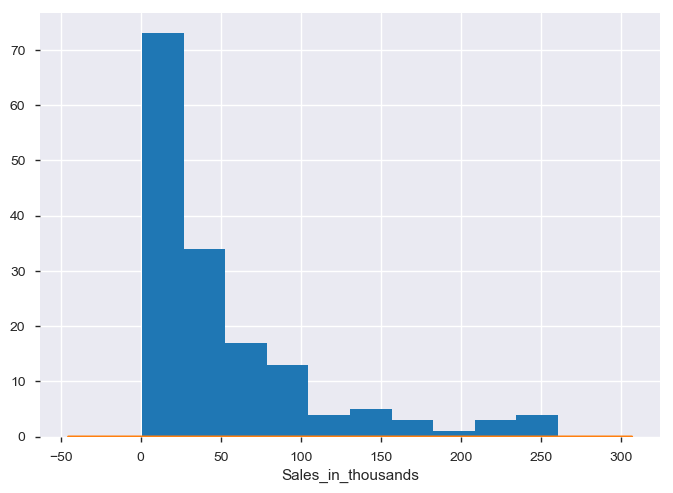

In [49]:
#Normality
car_sales_new.Sales_in_thousands.hist()

# Distribution of variables
import seaborn as sns
sns.distplot(car_sales_new.Sales_in_thousands)

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


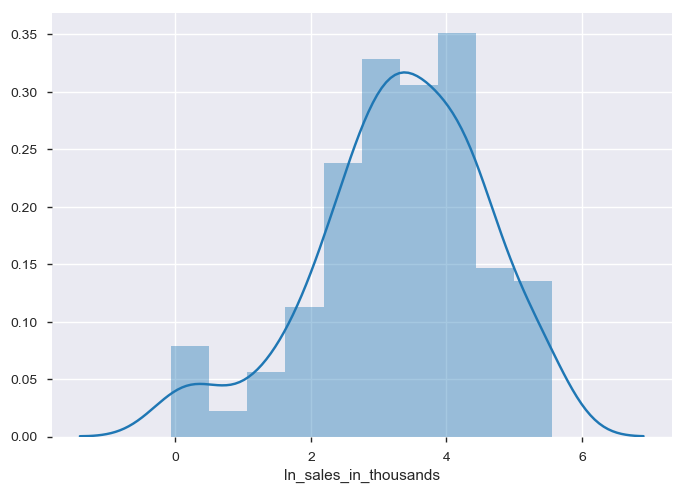

In [50]:
car_sales_new["ln_sales_in_thousands"]= np.log(car_sales_new["Sales_in_thousands"])

# Distribution of variables
import seaborn as sns
sns.distplot(car_sales_new.ln_sales_in_thousands)

In [51]:
#Linearity
# correlation matrix (ranges from 1 to -1)
corrm=car_sales_new.corr()

In [52]:
corrm

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,...,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger,ln_sales_in_thousands
Sales_in_thousands,1.000000,-0.277375,-0.360085,-0.014355,-0.259332,0.278261,0.092996,0.201007,-0.035062,0.044389,...,0.036853,-0.114192,-0.079886,-0.054683,-0.021816,0.133404,-0.056294,-0.133361,-0.230252,0.799513
four_year_resale_value,-0.277375,1.000000,0.793482,0.433034,0.650285,-0.040888,0.165259,0.040030,0.276207,0.268711,...,-0.065511,0.517804,-0.033931,-0.097963,-0.033931,-0.018848,-0.056776,-0.059543,0.084599,-0.446756
Price_in_thousands,-0.360085,0.793482,1.000000,0.617601,0.847967,0.118272,0.328579,0.157225,0.526211,0.431413,...,-0.061809,0.352504,0.019062,-0.169161,-0.047888,-0.093559,-0.136904,0.052376,0.044229,-0.577814
Engine_size,-0.014355,0.433034,0.617601,1.000000,0.814995,0.518433,0.702596,0.576364,0.793321,0.698313,...,0.078343,0.016720,-0.104716,-0.191354,-0.063982,-0.108018,-0.221204,-0.153125,-0.278720,-0.121158
Horsepower,-0.259332,0.650285,0.847967,0.814995,1.000000,0.325276,0.538193,0.420399,0.637164,0.526638,...,-0.001035,0.231530,-0.016823,-0.226951,-0.043878,-0.115615,-0.244750,-0.011797,-0.010312,-0.401010
Wheelbase,0.278261,-0.040888,0.118272,0.518433,0.325276,1.000000,0.681390,0.837535,0.656884,0.659692,...,0.046376,-0.260791,-0.045175,-0.083439,-0.092140,-0.093985,-0.203574,-0.085580,-0.382446,0.269998
Width,0.092996,0.165259,0.328579,0.702596,0.538193,0.681390,1.000000,0.700024,0.710129,0.648637,...,0.042466,-0.060717,-0.073017,-0.200565,-0.110105,-0.115409,-0.187300,-0.094605,-0.239476,0.037676
Length,0.201007,0.040030,0.157225,0.576364,0.420399,0.837535,0.700024,1.000000,0.622352,0.561758,...,0.096536,-0.149922,-0.014260,-0.061445,-0.059569,-0.103678,-0.304586,-0.059173,-0.130166,0.207373
Curb_weight,-0.035062,0.276207,0.526211,0.793321,0.637164,0.656884,0.710129,0.622352,1.000000,0.868023,...,0.007816,-0.094518,-0.044951,-0.221330,-0.020049,-0.070576,-0.161803,-0.030435,-0.518975,-0.051945
Fuel_capacity,0.044389,0.268711,0.431413,0.698313,0.526638,0.659692,0.648637,0.561758,0.868023,1.000000,...,-0.001399,-0.034685,-0.007281,-0.260082,-0.046183,-0.011476,-0.170318,-0.005775,-0.592574,-0.020221


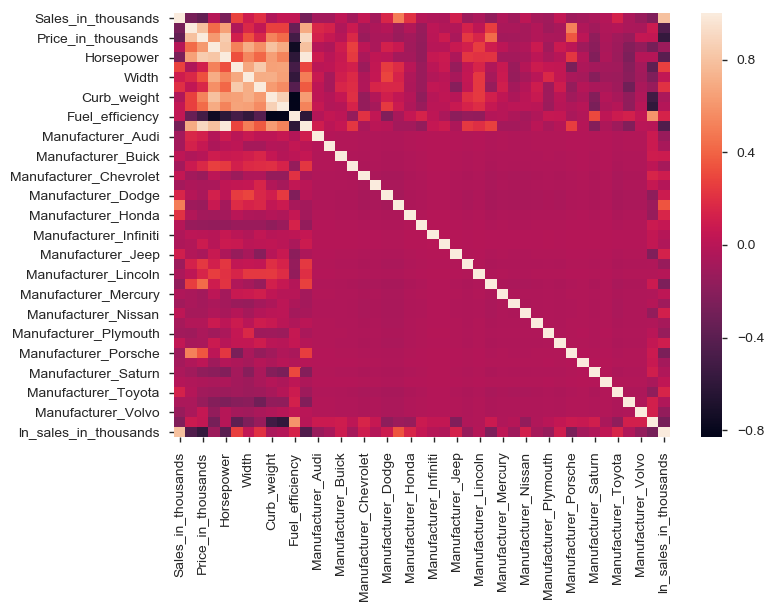

In [53]:
corrm.to_csv('corrm.csv')

# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(car_sales_new.corr())

In [54]:
#Dropping the variables based low correlation with Y

In [55]:
car_sales_new.drop(['Curb_weight','Fuel_capacity','Manufacturer_BMW','Manufacturer_Buick','Manufacturer_Cadillac','Manufacturer_Chevrolet','Manufacturer_Chrysler','Manufacturer_Hyundai','Manufacturer_Infiniti','Manufacturer_Jaguar','Manufacturer_Lincoln','Manufacturer_Mercury','Manufacturer_Oldsmobile','Manufacturer_Pontiac','Manufacturer_Saab','Manufacturer_Saturn','Manufacturer_Subaru','Manufacturer_Volkswagen'], axis=1, inplace=True)

car_sales_new

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Fuel_efficiency,Power_perf_factor,...,Manufacturer_Lexus,Manufacturer_Mercedes-B,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_Plymouth,Manufacturer_Porsche,Manufacturer_Toyota,Manufacturer_Volvo,Vehicle_type_Passenger,ln_sales_in_thousands
0,16.919,16.360,21.50000,1.800,140.00,101.2,67.300,172.400,28.0,58.280150,...,0,0,0,0,0,0,0,0,1,2.828437
1,39.384,19.875,28.40000,3.200,225.00,108.1,70.300,192.900,25.0,91.370778,...,0,0,0,0,0,0,0,0,1,3.673360
2,14.114,18.225,22.79900,3.200,225.00,106.9,70.600,192.000,26.0,72.030917,...,0,0,0,0,0,0,0,0,1,2.647167
3,8.588,29.725,42.00000,3.500,210.00,114.6,71.400,196.600,22.0,91.389779,...,0,0,0,0,0,0,0,0,1,2.150366
4,20.397,22.255,23.99000,1.800,150.00,102.6,68.200,178.000,27.0,62.777639,...,0,0,0,0,0,0,0,0,1,3.015388
5,18.780,23.555,33.95000,2.800,200.00,108.7,76.100,192.000,22.0,84.565105,...,0,0,0,0,0,0,0,0,1,2.932792
6,1.380,39.000,62.00000,4.200,310.00,113.0,74.000,198.200,21.0,134.656858,...,0,0,0,0,0,0,0,0,1,0.322083
7,19.747,14.180,26.99000,2.500,170.00,107.3,68.400,176.000,26.0,71.191207,...,0,0,0,0,0,0,0,0,1,2.983002
8,9.231,28.675,33.40000,2.800,193.00,107.3,68.500,176.000,24.0,81.877069,...,0,0,0,0,0,0,0,0,1,2.222567
9,17.527,36.125,38.90000,2.800,193.00,111.4,70.900,188.000,25.0,83.998724,...,0,0,0,0,0,0,0,0,1,2.863743


In [56]:
#Dropping variables with less variance in the data
car_sales_new.drop(['Wheelbase', 'Length', 'Width'], axis=1, inplace=True)

#### What relationships do you notice?

In [57]:
#Splitting the data
feature_columns = car_sales_new.columns.difference( ['ln_sales_in_thousands', 'Sales_in_thousands'] )
feature_columns

Index(['Engine_size', 'Fuel_efficiency', 'Horsepower', 'Manufacturer_Audi',
       'Manufacturer_Dodge', 'Manufacturer_Ford', 'Manufacturer_Honda',
       'Manufacturer_Jeep', 'Manufacturer_Lexus', 'Manufacturer_Mercedes-B',
       'Manufacturer_Mitsubishi', 'Manufacturer_Nissan',
       'Manufacturer_Plymouth', 'Manufacturer_Porsche', 'Manufacturer_Toyota',
       'Manufacturer_Volvo', 'Power_perf_factor', 'Price_in_thousands',
       'Vehicle_type_Passenger', 'four_year_resale_value'],
      dtype='object')

In [58]:
#This will be used in sklearn related functions
from sklearn.cross_validation import train_test_split

train_X, test_X, train_y, test_y = train_test_split( car_sales_new[feature_columns],
                                                  car_sales_new['ln_sales_in_thousands'],
                                                  test_size = 0.3,
                                                  random_state = 1234 )

In [59]:
print(len( train_X ))
print(len( test_X))

109
48


In [60]:
from sklearn.cross_validation import train_test_split

train, test = train_test_split( car_sales_new,test_size = 0.3,random_state = 1234 )

In [61]:
len(train)

109

In [62]:
len(test)

48

## Form of linear regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

The $\beta$ values are called the **model coefficients**:

- These values are estimated (or "learned") during the model fitting process using the **least squares criterion**.
- Specifically, we are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors").
- And once we've learned these coefficients, we can use the model to predict the response.

![Estimating coefficients](images/estimating_coefficients.png)

In the diagram above:

- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the vertical distances between the observed values and the least squares line.

## Building a linear regression model

In [63]:
import statsmodels.formula.api as smf

In [64]:
#m1 = smf.ols('y~x1+x2+x3...xn', data=train) # Definig y & X with classs
#m1 = smf.ols('y~.'' , data = train)
#m1.fit()     #building model (estimating the betas)
#m1.summary() #output
#m1.predict(train)
#m1.predict(test)

In [65]:
lm=smf.ols('ln_sales_in_thousands~Price_in_thousands+four_year_resale_value+Engine_size+Horsepower+Fuel_efficiency+Vehicle_type_Passenger', train).fit()

In [66]:
print(lm.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_sales_in_thousands   R-squared:                       0.461
Model:                               OLS   Adj. R-squared:                  0.429
Method:                    Least Squares   F-statistic:                     14.54
Date:                   Wed, 28 Nov 2018   Prob (F-statistic):           6.27e-12
Time:                           08:10:42   Log-Likelihood:                -138.20
No. Observations:                    109   AIC:                             290.4
Df Residuals:                        102   BIC:                             309.2
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [67]:
lm=smf.ols('ln_sales_in_thousands~Price_in_thousands+Engine_size+Fuel_efficiency+Vehicle_type_Passenger', train).fit()
print(lm.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_sales_in_thousands   R-squared:                       0.457
Model:                               OLS   Adj. R-squared:                  0.436
Method:                    Least Squares   F-statistic:                     21.89
Date:                   Wed, 28 Nov 2018   Prob (F-statistic):           3.99e-13
Time:                           08:10:42   Log-Likelihood:                -138.60
No. Observations:                    109   AIC:                             287.2
Df Residuals:                        104   BIC:                             300.6
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### Mathematical equation:
ln_sales_in_thousands = 1.9043 - 0.0631 * Price_in_thousands + 0.5813* Engine_size + 0.0816*Fuel_efficiency - Vehicle_type_Passenger*0.7356

sales_in_thousands = exp(ln_sales_in_thousands)

#### Check the multicollinieirity using VIF for all the variables in the model

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y, X = dmatrices('ln_sales_in_thousands~Engine_size+Manufacturer_Ford+Manufacturer_Plymouth+Manufacturer_Toyota+four_year_resale_value', train, return_type='dataframe')



# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif.round(1)

,VIF Factor,features
0,12.6,Intercept
1,1.3,Engine_size
2,1.0,Manufacturer_Ford
3,1.0,Manufacturer_Plymouth
4,1.0,Manufacturer_Toyota
5,1.3,four_year_resale_value


#### Predict the Y (Scoring the train & test and validate the results)

In [69]:
train['pred_sales'] = np.exp(lm.predict(train))-1
train.head()

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Fuel_efficiency,Power_perf_factor,Manufacturer_Audi,Manufacturer_Dodge,Manufacturer_Ford,...,Manufacturer_Mercedes-B,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_Plymouth,Manufacturer_Porsche,Manufacturer_Toyota,Manufacturer_Volvo,Vehicle_type_Passenger,ln_sales_in_thousands,pred_sales
24,17.947,36.225,45.7050,5.7,325.75,22.0,141.119461,0,0,0,...,0,0,0,0,0,0,0,1,2.887423,26.087441
99,0.954,14.180,78.4798,5.0,302.00,20.0,141.100985,0,0,0,...,1,0,0,0,0,0,0,1,-0.047092,0.534543
8,9.231,28.675,33.4000,2.8,193.00,24.0,81.877069,0,0,0,...,0,0,0,0,0,0,0,1,2.222567,11.333779
20,135.126,11.225,16.5350,3.1,170.00,25.0,67.314462,0,0,0,...,0,0,0,0,0,0,0,1,4.906208,50.903983
22,42.593,11.525,19.3900,3.4,180.00,27.0,72.030917,0,0,0,...,0,0,0,0,0,0,0,1,3.751690,60.455166


In [70]:
test['pred_sales'] = np.exp(lm.predict(test))-1
test.head()

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Fuel_efficiency,Power_perf_factor,Manufacturer_Audi,Manufacturer_Dodge,Manufacturer_Ford,...,Manufacturer_Mercedes-B,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_Plymouth,Manufacturer_Porsche,Manufacturer_Toyota,Manufacturer_Volvo,Vehicle_type_Passenger,ln_sales_in_thousands,pred_sales
58,230.902,13.210,15.350,2.3,135.0,27.0,54.269548,0,0,0,...,0,0,0,0,0,0,0,1,5.441993,39.821158
91,20.380,14.795,22.510,3.3,170.0,21.0,69.671461,0,0,0,...,0,0,0,0,0,0,0,0,3.014554,59.573656
98,11.592,14.180,41.600,3.2,215.0,26.0,92.925792,0,0,0,...,1,0,0,0,0,0,0,1,2.450315,9.760443
29,32.775,14.180,24.495,2.5,168.0,24.0,69.521355,0,0,0,...,0,0,0,0,0,0,0,1,3.489666,17.873990
6,1.380,39.000,62.000,4.2,310.0,21.0,134.656858,1,0,0,...,0,0,0,0,0,0,0,1,0.322083,2.163361


In [71]:
#Accuracy Metrics
#accuracy metrics
MAPE_train = np.mean(np.abs(train['Sales_in_thousands'] - train['pred_sales'])/train['Sales_in_thousands'])
print(MAPE_train)
MAPE_test = np.mean(np.abs(test['Sales_in_thousands'] - test['pred_sales'])/test['Sales_in_thousands'])
print(MAPE_test)

0.9567647256511012
1.5745456340260036


In [72]:
np.corrcoef(train['Sales_in_thousands'],  train['pred_sales'])

array([[1.        , 0.49213482],
       [0.49213482, 1.        ]])

In [73]:
corr_train = np.corrcoef(train['Sales_in_thousands'],  train['pred_sales'])[1][[0]]
corr_test = np.corrcoef(test['Sales_in_thousands'],  test['pred_sales'])[1][[0]]
print(corr_train); print(corr_test)

[0.49213482]
[0.6143215]


#### Regression with all the variables

In [74]:
train.columns= [var.strip().replace('-', '') for var in train.columns]
train.columns

Index(['Sales_in_thousands', 'four_year_resale_value', 'Price_in_thousands',
       'Engine_size', 'Horsepower', 'Fuel_efficiency', 'Power_perf_factor',
       'Manufacturer_Audi', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_MercedesB', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Plymouth', 'Manufacturer_Porsche',
       'Manufacturer_Toyota', 'Manufacturer_Volvo', 'Vehicle_type_Passenger',
       'ln_sales_in_thousands', 'pred_sales'],
      dtype='object')

In [75]:
all_columns = "+".join(train.columns.difference( ['ln_sales_in_thousands'] ))

print(all_columns)

Engine_size+Fuel_efficiency+Horsepower+Manufacturer_Audi+Manufacturer_Dodge+Manufacturer_Ford+Manufacturer_Honda+Manufacturer_Jeep+Manufacturer_Lexus+Manufacturer_MercedesB+Manufacturer_Mitsubishi+Manufacturer_Nissan+Manufacturer_Plymouth+Manufacturer_Porsche+Manufacturer_Toyota+Manufacturer_Volvo+Power_perf_factor+Price_in_thousands+Sales_in_thousands+Vehicle_type_Passenger+four_year_resale_value+pred_sales


In [76]:
my_formula = "ln_sales_in_thousands~" + all_columns

print(my_formula)

ln_sales_in_thousands~Engine_size+Fuel_efficiency+Horsepower+Manufacturer_Audi+Manufacturer_Dodge+Manufacturer_Ford+Manufacturer_Honda+Manufacturer_Jeep+Manufacturer_Lexus+Manufacturer_MercedesB+Manufacturer_Mitsubishi+Manufacturer_Nissan+Manufacturer_Plymouth+Manufacturer_Porsche+Manufacturer_Toyota+Manufacturer_Volvo+Power_perf_factor+Price_in_thousands+Sales_in_thousands+Vehicle_type_Passenger+four_year_resale_value+pred_sales


In [77]:
model2 = smf.ols(my_formula, data=train).fit()
print(model2.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_sales_in_thousands   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.800
Method:                    Least Squares   F-statistic:                     20.69
Date:                   Wed, 28 Nov 2018   Prob (F-statistic):           1.60e-25
Time:                           08:11:11   Log-Likelihood:                -71.627
No. Observations:                    109   AIC:                             189.3
Df Residuals:                         86   BIC:                             251.2
Df Model:                             22                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

### Feature Selection based on importance using F-Regression

In [78]:
# Feature Selection based on importance
from sklearn.feature_selection import f_regression
features = train_X
target = train_y
F_values, p_values  = f_regression(features, target )

In [79]:
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features.columns, F_values,  ['%.3f' % p for p in p_values])]

f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])

In [80]:
f_reg_results.sort_values(by=['P_Value'])

f_reg_results.P_Value = pd.to_numeric(f_reg_results.P_Value)

In [81]:
f_reg_results_new=f_reg_results[f_reg_results.P_Value<=0.2]

f_reg_results_new

,Variable,F_Value,P_Value
2,Horsepower,13.645173,0.000
5,Manufacturer_Ford,24.576637,0.000
7,Manufacturer_Jeep,2.909748,0.091
8,Manufacturer_Lexus,2.530412,0.115
9,Manufacturer_Mercedes-B,9.410206,0.003
12,Manufacturer_Plymouth,5.448305,0.021
14,Manufacturer_Toyota,5.983694,0.016
15,Manufacturer_Volvo,5.172131,0.025
16,Power_perf_factor,18.001283,0.000
17,Price_in_thousands,41.999471,0.000


If p - values are less, then variables are siginificant in the regression equation.

#### Model building

In [82]:
#Create formula after selection of variables from f-regression

In [83]:
my_formula = 'ln_sales_in_thousands~Engine_size+Manufacturer_Ford+Manufacturer_Plymouth+Manufacturer_Toyota+Price_in_thousands'


In [84]:
lm = smf.ols(my_formula, data=train).fit()
print(lm.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_sales_in_thousands   R-squared:                       0.570
Model:                               OLS   Adj. R-squared:                  0.549
Method:                    Least Squares   F-statistic:                     27.27
Date:                   Wed, 28 Nov 2018   Prob (F-statistic):           1.75e-17
Time:                           08:11:56   Log-Likelihood:                -125.93
No. Observations:                    109   AIC:                             263.9
Df Residuals:                        103   BIC:                             280.0
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [85]:
lm.predict(train)

24     3.176570
99     0.536722
8      2.609691
20     3.938429
22     3.886288
73     1.757956
36     3.467111
134    3.211522
32     3.308831
147    2.971391
131    3.504519
123    3.448987
9      2.224558
154    2.734764
141    4.384767
149    3.329000
133    3.601880
136    4.442077
1      3.156851
105    3.143158
64     3.701169
52     4.721503
68     4.025692
21     3.773522
33     3.450537
0      2.950384
79     3.476476
62     3.618771
140    4.848273
150    3.441039
         ...   
130    3.627411
14     3.041556
107    3.942065
115    2.203636
19     3.724422
2      3.549057
3      2.352299
142    4.275905
75     2.623831
128    2.726792
34     3.249660
37     3.384132
76     3.098625
50     5.109838
127    2.383000
80     3.417711
69     3.656314
112    3.474768
120    3.668783
118    3.238239
26     3.618771
124    1.998137
30     3.341552
23     3.736707
143    4.242591
152    2.796573
116    2.206707
53     4.965563
38     3.323346
47     5.349136
Length: 109, dtype: floa

In [86]:
train['pred_ln_sales'] = lm.predict(train)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [87]:
train.head()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Fuel_efficiency,Power_perf_factor,Manufacturer_Audi,Manufacturer_Dodge,Manufacturer_Ford,...,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_Plymouth,Manufacturer_Porsche,Manufacturer_Toyota,Manufacturer_Volvo,Vehicle_type_Passenger,ln_sales_in_thousands,pred_sales,pred_ln_sales
24,17.947,36.225,45.7050,5.7,325.75,22.0,141.119461,0,0,0,...,0,0,0,0,0,0,1,2.887423,26.087441,3.176570
99,0.954,14.180,78.4798,5.0,302.00,20.0,141.100985,0,0,0,...,0,0,0,0,0,0,1,-0.047092,0.534543,0.536722
8,9.231,28.675,33.4000,2.8,193.00,24.0,81.877069,0,0,0,...,0,0,0,0,0,0,1,2.222567,11.333779,2.609691
20,135.126,11.225,16.5350,3.1,170.00,25.0,67.314462,0,0,0,...,0,0,0,0,0,0,1,4.906208,50.903983,3.938429
22,42.593,11.525,19.3900,3.4,180.00,27.0,72.030917,0,0,0,...,0,0,0,0,0,0,1,3.751690,60.455166,3.886288


In [88]:
test['pred_ln_sales']  = lm.predict(test)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [89]:
test.head()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Fuel_efficiency,Power_perf_factor,Manufacturer_Audi,Manufacturer_Dodge,Manufacturer_Ford,...,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_Plymouth,Manufacturer_Porsche,Manufacturer_Toyota,Manufacturer_Volvo,Vehicle_type_Passenger,ln_sales_in_thousands,pred_sales,pred_ln_sales
58,230.902,13.210,15.350,2.3,135.0,27.0,54.269548,0,0,0,...,0,0,0,0,0,0,1,5.441993,39.821158,3.627331
91,20.380,14.795,22.510,3.3,170.0,21.0,69.671461,0,0,0,...,0,0,0,0,0,0,0,3.014554,59.573656,3.618553
98,11.592,14.180,41.600,3.2,215.0,26.0,92.925792,0,0,0,...,0,0,0,0,0,0,1,2.450315,9.760443,2.232530
29,32.775,14.180,24.495,2.5,168.0,24.0,69.521355,0,0,0,...,0,0,0,0,0,0,1,3.489666,17.873990,3.085478
6,1.380,39.000,62.000,4.2,310.0,21.0,134.656858,1,0,0,...,0,0,0,0,0,0,1,0.322083,2.163361,1.296631


In [90]:
train['actual_sales'] = np.exp(train.ln_sales_in_thousands)
test['actual_sales'] = np.exp(test.ln_sales_in_thousands)

train['pred_sales'] = np.exp(train.pred_ln_sales)
test['pred_sales'] = np.exp(test.pred_ln_sales)


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

In [91]:
train.head()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Fuel_efficiency,Power_perf_factor,Manufacturer_Audi,Manufacturer_Dodge,Manufacturer_Ford,...,Manufacturer_Nissan,Manufacturer_Plymouth,Manufacturer_Porsche,Manufacturer_Toyota,Manufacturer_Volvo,Vehicle_type_Passenger,ln_sales_in_thousands,pred_sales,pred_ln_sales,actual_sales
24,17.947,36.225,45.7050,5.7,325.75,22.0,141.119461,0,0,0,...,0,0,0,0,0,1,2.887423,23.964414,3.176570,17.947
99,0.954,14.180,78.4798,5.0,302.00,20.0,141.100985,0,0,0,...,0,0,0,0,0,1,-0.047092,1.710390,0.536722,0.954
8,9.231,28.675,33.4000,2.8,193.00,24.0,81.877069,0,0,0,...,0,0,0,0,0,1,2.222567,13.594851,2.609691,9.231
20,135.126,11.225,16.5350,3.1,170.00,25.0,67.314462,0,0,0,...,0,0,0,0,0,1,4.906208,51.337888,3.938429,135.126
22,42.593,11.525,19.3900,3.4,180.00,27.0,72.030917,0,0,0,...,0,0,0,0,0,1,3.751690,48.729689,3.886288,42.593


In [92]:
test.head()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Fuel_efficiency,Power_perf_factor,Manufacturer_Audi,Manufacturer_Dodge,Manufacturer_Ford,...,Manufacturer_Nissan,Manufacturer_Plymouth,Manufacturer_Porsche,Manufacturer_Toyota,Manufacturer_Volvo,Vehicle_type_Passenger,ln_sales_in_thousands,pred_sales,pred_ln_sales,actual_sales
58,230.902,13.210,15.350,2.3,135.0,27.0,54.269548,0,0,0,...,0,0,0,0,0,1,5.441993,37.612305,3.627331,230.902
91,20.380,14.795,22.510,3.3,170.0,21.0,69.671461,0,0,0,...,0,0,0,0,0,0,3.014554,37.283587,3.618553,20.380
98,11.592,14.180,41.600,3.2,215.0,26.0,92.925792,0,0,0,...,0,0,0,0,0,1,2.450315,9.323428,2.232530,11.592
29,32.775,14.180,24.495,2.5,168.0,24.0,69.521355,0,0,0,...,0,0,0,0,0,1,3.489666,21.877932,3.085478,32.775
6,1.380,39.000,62.000,4.2,310.0,21.0,134.656858,1,0,0,...,0,0,0,0,0,1,0.322083,3.656956,1.296631,1.380


In [93]:
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
import scipy.stats as stats

In [94]:
#Train Data
MAPE_train = np.mean(np.abs(train.actual_sales - train.pred_sales)/train.actual_sales )
print(MAPE_train)


RMSE_train = metrics.mean_squared_error(train.actual_sales , train.pred_sales)
print(RMSE_train)

Corr_train = stats.stats.pearsonr(train.actual_sales , train.pred_sales)
print(Corr_train)


#Test Data
MAPE_test = np.mean(np.abs(test.actual_sales - test.pred_sales)/test.actual_sales )
print(MAPE_test)

RMSE_test = metrics.mean_squared_error(test.actual_sales , test.pred_sales)
print(RMSE_test)

Corr_test = stats.stats.pearsonr(test.actual_sales , test.pred_sales)
print(Corr_test)

0.9015978808355656
1615.5407305058457
(0.743328116637324, 2.125227996007529e-20)
1.8022619137191525
3914.537072942238
(0.3046385041563133, 0.03526607240584849)


In [95]:
#Possible reasons for model is not validating (over fitting)

#Data preparation problem (outliers, missings, variable conversions etc. not correct)
#not included right variables
#If the data have multicollinerity
#Including more number of variables 
#Data size is very low  (ideally we should have 1varaible = 100 obs)
#The assumptions are not 100% valid
#The variables are not explaining completely

# how to over come this problem
#Increase the data size
# Change the variables - Reiterate the model with different combinations of variables
# Apply right transformations on X variables such the the linear relationship between Y & X will imrpvove
#Add dervied variables which can explain Y better
#Re look into data preparation steps
#Look at the Importance of variables include them in the model
#Change the technique

In [96]:
# THere are few techniques can help you to identify important variables (Variable selection - Feature selection)
# F-Regression
# RFE - Recursive feature elimination - Stepwise regression

In [97]:
#Residuals Diagnostics

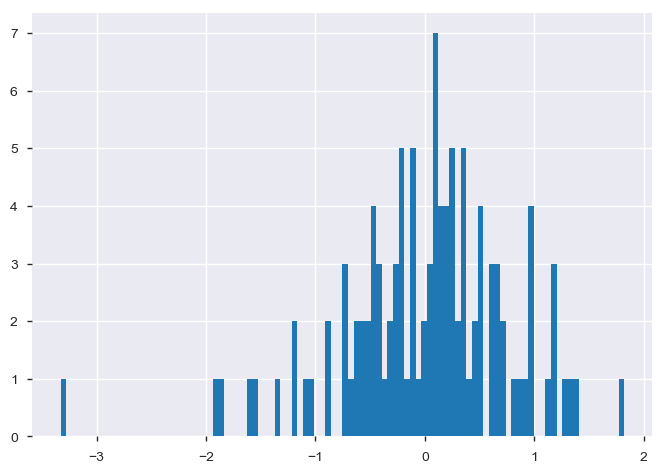

In [98]:
lm.resid.hist(bins=100)

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


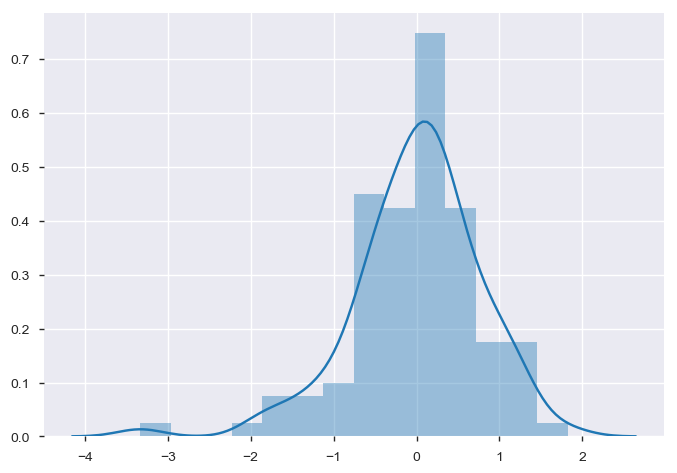

In [99]:
sns.distplot(lm.resid)

In [100]:
stats.pearsonr(train.ln_sales_in_thousands, lm.resid)

(0.6559870920739805, 9.783787199763848e-15)

### Exercise: Decile Analysis for Linear Regression

In [103]:
train.columns

Index(['Sales_in_thousands', 'four_year_resale_value', 'Price_in_thousands',
       'Engine_size', 'Horsepower', 'Fuel_efficiency', 'Power_perf_factor',
       'Manufacturer_Audi', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_MercedesB', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Plymouth', 'Manufacturer_Porsche',
       'Manufacturer_Toyota', 'Manufacturer_Volvo', 'Vehicle_type_Passenger',
       'ln_sales_in_thousands', 'pred_sales', 'pred_ln_sales', 'actual_sales'],
      dtype='object')

In [104]:
### Decile Analysis
#Decile analysis for validation of models - Business validation

train['Deciles']=pd.qcut(train['pred_sales'],10, labels=False)
test['Deciles']=pd.qcut(test['pred_sales'],10, labels=False)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [106]:
# Decile Analysis for train data
Predicted_avg = train[['Deciles','pred_sales']].groupby(train.Deciles).mean().sort_index(ascending=False)['pred_sales']
Actual_avg = train[['Deciles','Sales_in_thousands']].groupby(train.Deciles).mean().sort_index(ascending=False)['Sales_in_thousands']

Decile_analysis_train = pd.concat([Predicted_avg, Actual_avg], axis=1)

Decile_analysis_train

,pred_sales,Sales_in_thousands
Deciles,,
9,155.144270,163.140876
8,62.617933,88.879545
7,42.037246,58.382909
6,35.309275,44.291727
5,31.610698,31.409900
4,28.468390,42.877298
3,24.267186,35.324091
2,18.609284,22.689636
1,13.192045,18.478182


In [110]:
# Decile Analysis for train data
Predicted_avg = test[['Deciles','pred_sales']].groupby(test.Deciles).mean().sort_index(ascending=False)['pred_sales']
Actual_avg = test[['Deciles','Sales_in_thousands']].groupby(test.Deciles).mean().sort_index(ascending=False)['Sales_in_thousands']

In [111]:
Decile_analysis_test = pd.concat([Predicted_avg, Actual_avg], axis=1)

Decile_analysis_test

,pred_sales,Sales_in_thousands
Deciles,,
9,149.381968,96.381600
8,50.161220,68.033000
7,38.874938,86.924400
6,35.440255,41.334750
5,31.653931,84.259200
4,27.489237,43.486000
3,22.001389,32.559250
2,15.482482,26.987000
1,6.777731,13.062600


In [ ]:
Decile_analysis_train.to_csv('Decile_analysis_train.csv')

Decile_analysis_test.to_csv('Decile_analysis_test.csv')

In [ ]:
#Key Checks: Compare the deciles for training & testing as follows
    #Rank orderng
    #Decile wise comparision between actual & predicted

### USING sklearn Library to build the model
> sklearn library has a comprehensive set of APIs to split datasets, build models, test models and calculate accuracy metrics

In [112]:
## Building the model with train set and make predictions on test set
from sklearn.linear_model import LinearRegression
from sklearn import metrics

linreg = LinearRegression()
linreg.fit( train_X, train_y )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [113]:
linreg.coef_

array([ 0.3629954 ,  0.07583082, -0.01033786,  0.39212037,  0.30814558,
        1.48275637, -0.85073856,  0.78405729,  0.10401663,  0.28706069,
       -0.36324242,  0.56475717, -1.21457757,  0.24879907,  0.67980742,
       -0.0945945 ,  0.04515353, -0.09482092, -0.58856812,  0.00719481])

In [114]:
linreg.score(train_X, train_y)

0.6336535286906672

In [115]:
y_pred_t = linreg.predict(train_X)
y_pred_t

array([3.6226703 , 0.48231638, 2.53144405, 3.76999671, 3.87158765,
       1.96918489, 3.55324251, 3.06143692, 3.36590711, 3.00030301,
       3.68680219, 3.72071862, 2.23516134, 2.47372121, 4.47836057,
       3.06733522, 3.61362399, 4.54425019, 3.26112622, 3.60269884,
       3.48597864, 4.79627583, 4.83816119, 3.60929388, 3.84773165,
       2.99395939, 3.15401047, 3.6835875 , 4.84234531, 3.19420135,
       3.19357795, 5.5004017 , 3.21625713, 3.7961093 , 3.38608331,
       3.99421646, 2.64766967, 3.12622036, 0.84231669, 2.73192317,
       4.20628072, 2.83298693, 1.37498575, 4.06582285, 3.60918646,
       3.15089579, 2.77659146, 4.94204338, 2.21385188, 2.3951127 ,
       3.60320674, 4.44967451, 3.33716556, 3.86635099, 2.86478563,
       5.3769952 , 2.35721444, 3.89721887, 3.01008378, 3.98711812,
       2.65813826, 3.75422283, 3.30981542, 4.19390772, 0.75139678,
       3.67496107, 2.6592537 , 3.02382213, 2.23588454, 2.57434471,
       3.36631544, 3.50222795, 2.93544564, 3.18223075, 5.19996

In [118]:
y_pred_t = linreg.predict(train_X)
rmse_t = np.sqrt( metrics.mean_squared_error( train_y, y_pred_t) )
print(rmse_t)
print(metrics.r2_score( train_y, y_pred_t ))

0.7088465949957897
0.6336535286906672


In [119]:
y_pred = linreg.predict( test_X )
rmse = np.sqrt( metrics.mean_squared_error( test_y, y_pred ) )
print(rmse)
print(metrics.r2_score( test_y, y_pred ))

1.1658376715131704
0.3302141249824685


In [120]:
residuals = train_y - y_pred_t

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


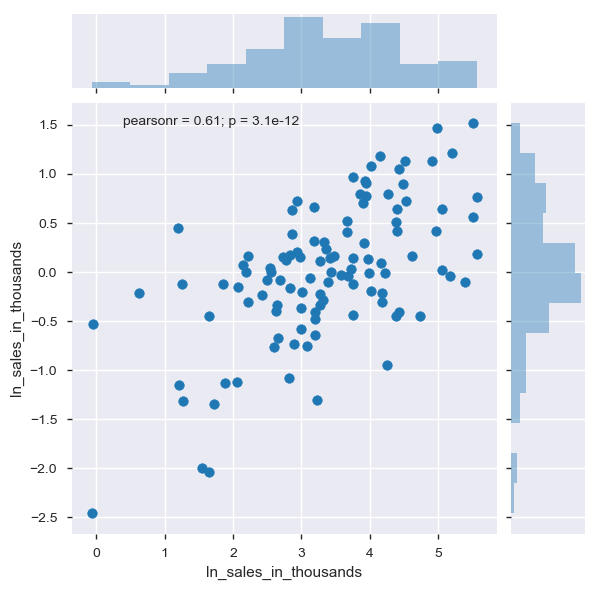

In [121]:
sns.jointplot(  train_y, residuals )

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


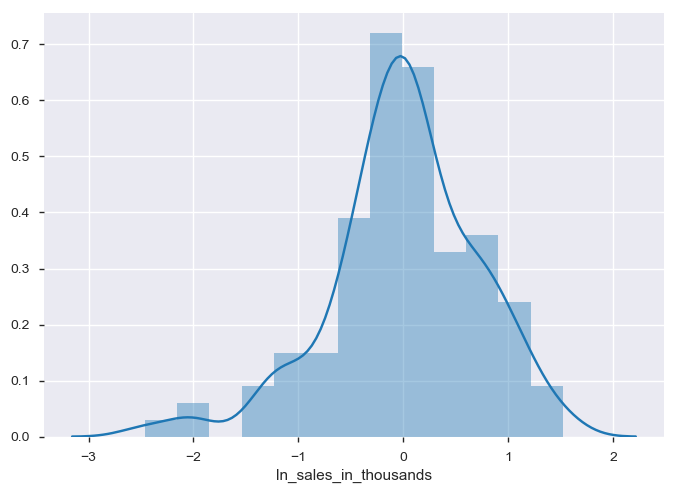

In [122]:
sns.distplot( residuals )

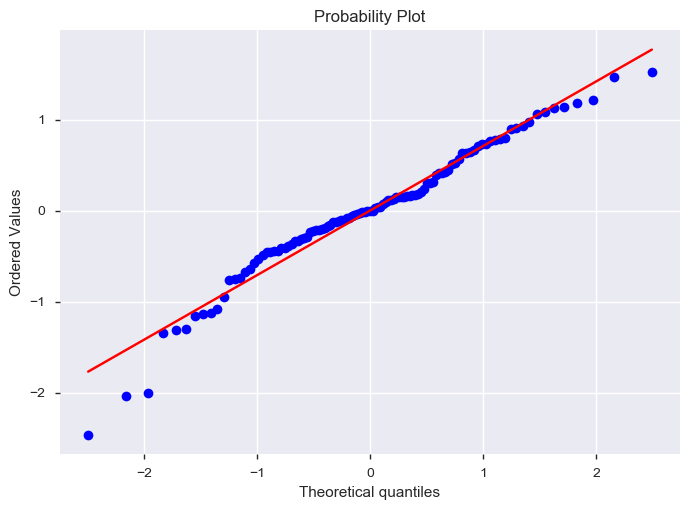

In [123]:
# To ensure residues are random i.e. normally distributed a Q-Q plot can be used
# Q-Q plot shows if the residuals are plotted along the line.
from scipy import stats
import pylab

stats.probplot( residuals, dist="norm", plot=pylab )
pylab.show()

The residuals are randomly distributed. There are no visible relationship. The model can be assumed to be correct

In [124]:
### K-FOLD CROSS VALIDATION
from sklearn.cross_validation import cross_val_score

In [125]:
linreg = LinearRegression()

In [126]:
cross_val_score( linreg, train_X, train_y, scoring = 'r2', cv = 10 )

array([ 0.15817974,  0.59638468,  0.70514214,  0.6620212 ,  0.38069001,
        0.53417905,  0.21978841, -0.82541714,  0.49723757,  0.51248866])

In [127]:
round( np.mean( cross_val_score( linreg,
                              train_X,
                              train_y,
                              scoring = 'r2',
                              cv = 10 ) ), 2 )

0.34

### Other Reading information

### Feature selection

How do we choose which features to include in the model? We're going to use **train/test split** (and eventually **cross-validation**).

Why not use of **p-values** or **R-squared** for feature selection?

- Linear models rely upon **a lot of assumptions** (such as the features being independent), and if those assumptions are violated, p-values and R-squared are less reliable. Train/test split relies on fewer assumptions.
- Features that are unrelated to the response can still have **significant p-values**.
- Adding features to your model that are unrelated to the response will always **increase the R-squared value**, and adjusted R-squared does not sufficiently account for this.
- p-values and R-squared are **proxies** for our goal of generalization, whereas train/test split and cross-validation attempt to **directly estimate** how well the model will generalize to out-of-sample data.

More generally:

- There are different methodologies that can be used for solving any given data science problem, and this course follows a **machine learning methodology**.
- This course focuses on **general purpose approaches** that can be applied to any model, rather than model-specific approaches.

### Evaluating Model Accuracy
> R-squared is a statistical measure of how close the data are to the fitted regression line. <br>
> R-square signifies percentage of variations in the reponse variable that can be explained by the model. <br>
> - R-squared = Explained variation / Total variation <br>
> - Total variation is variation of response variable around it's mean. <br>

> R-squared value varies between 0 and 100%. 0% signifies that the model explains none of the variability, <br>
while 100% signifies that the model explains all the variability of the response. <br>
The closer the r-square to 100%, the better is the model. <br>

## Other Evaluation metrics for regression problems

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. We need evaluation metrics designed for comparing **continuous values**.

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

## Comparing linear regression with other models

Advantages of linear regression:

- Simple to explain
- Highly interpretable
- Model training and prediction are fast
- No tuning is required (excluding regularization)
- Features don't need scaling
- Can perform well with a small number of observations
- Well-understood

Disadvantages of linear regression:

- Presumes a linear relationship between the features and the response
- Performance is (generally) not competitive with the best supervised learning methods due to high bias
- Can't automatically learn feature interactions